In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = 'data/city_data.csv'
ride_data_to_load = 'data/ride_data.csv'

# Read the City and Ride Data
cd = pd.read_csv(city_data_to_load)
rd = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(rd, cd, on='city', how='left')

# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
urban = df[df['type'] == 'Urban'].groupby([df['city']])
suburban = df[df['type'] == 'Suburban'].groupby([df['city']])
rural = df[df['type'] == 'Rural'].groupby([df['city']])

## Bubble Plot of Ride Sharing Data

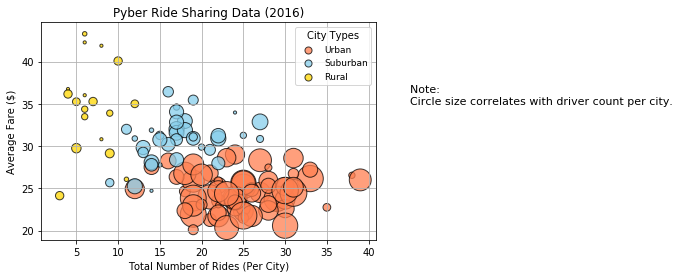

In [3]:
# Obtain the x and y coordinates for each of the three city types
urbanX = urban['ride_id'].count()
urbanY = urban['fare'].mean()
urbanS = urban['driver_count'].mean()
urbanS = urbanS*10

suburbanX = suburban['ride_id'].count()
suburbanY = suburban['fare'].mean()
suburbanS = suburban['driver_count'].mean()
suburbanS = suburbanS*10

ruralX = rural['ride_id'].count()
ruralY = rural['fare'].mean()
ruralS = rural['driver_count'].mean()
ruralS = ruralS*10

# Build the scatter plots for each city types
plt.scatter(urbanX, urbanY, s=urbanS, label='Urban', color=['coral'], edgecolor='black', alpha=0.75, marker='o')
plt.scatter(suburbanX, suburbanY, s=suburbanS, label='Suburban', color=['skyblue'], edgecolor='black', alpha=0.75, marker='o')
plt.scatter(ruralX, ruralY, s=ruralS, label='Rural', color=['gold'], edgecolor='black', alpha=0.75, marker='o')
plt.grid()

# Incorporate the other graph properties
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

# Create a legend
legend = plt.legend(fontsize = 9, title= 'City Types', loc='best') 

# Incorporate a text label regarding circle size
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
plt.text(45,35,'Note: \nCircle size correlates with driver count per city.', fontsize = 11)

# Save Figure
plt.savefig('data/PyberScatter.jpg', bbox_inches='tight')

plt.show()

## Total Fares by City Type

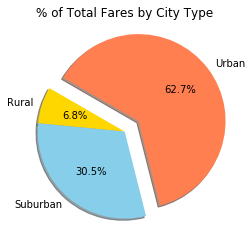

In [4]:
# Calculate Type Percents
cityType = df.groupby(['type'])
totalFare = cityType['fare'].sum()

# Build Pie Chart
labels = ['Rural','Suburban','Urban']
explode = (0, 0, 0.2)
colors = ['gold', 'skyblue', 'coral']
plt.pie(totalFare, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('Data/TotalFaresPieChart.jpg')

plt.show()

## Total Rides by City Type

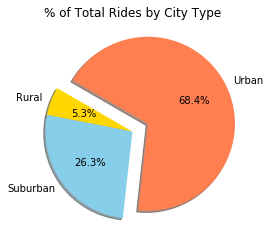

In [5]:
# Calculate Ride Percents
totalRides = cityType['ride_id'].count()

# Build Pie Chart
labels = ['Rural','Suburban','Urban']
explode = (0, 0, 0.2)
colors = ['gold', 'skyblue', 'coral']
plt.pie(totalRides, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('Data/TotalRidesPieChart.jpg')
plt.show()

## Total Drivers by City Type

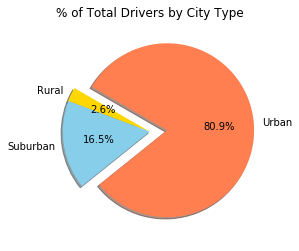

In [6]:
# Calculate Driver Percents
driversCityType = cd.groupby(['type'])
totalDrivers = driversCityType['driver_count'].sum()

# Build Pie Charts
labels = ['Rural','Suburban','Urban']
explode = (0, 0, 0.2)
colors = ['gold', 'skyblue', 'coral']
plt.pie(totalDrivers, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=150)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('Data/TotalDriversPieChart.jpg')

plt.show()